# Projeto: Ligações para o 911 

Neste projeto será analisado alguns dados de ligações para emergência em Montgomery
Country cujo o número telefonico é 911. 
Neste projeto não será trabalhado machine learning para prever alguma uma informação.

Os dados foram retirados do site: https://www.kaggle.com/mchirico/montcoalert

Importando bilibliotecas que iremos trabalhar no projeto

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dados_ligacoes = pd.read_csv ('911.csv')

In [3]:
dados_ligacoes.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Verificando os dados que o Dataframe possui. Sendo assim foi retornado as dez primeiras linhas

In [4]:
dados_ligacoes.head (10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


Verificando quantos valores faltantes possui a coluna "zip" e para assim a mesma seja tratada

In [5]:
dados_ligacoes['zip'].isnull().value_counts () 

False    86637
True     12855
Name: zip, dtype: int64

In [6]:
dados_ligacoes['zip'].fillna (value = 0, inplace = True)

In [7]:
# Verificando se os dados faltantes foram realmente trocados
dados_ligacoes['zip'].isnull().value_counts () 

False    99492
Name: zip, dtype: int64

O valor "0.0" representa os os CPF's não informados

In [8]:
dados_ligacoes['zip'].value_counts().head (6)

0.0        12855
19401.0     6979
19464.0     6643
19403.0     4854
19446.0     4748
19406.0     3174
Name: zip, dtype: int64

Agora será analisado quais os cinco principais Munícipios com mais ocorrências 

In [9]:
dados_ligacoes['twp'].value_counts().head ()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Descobrimos com o código abaixo a quantidade de títulos exclusivos existem no Dataframe

In [10]:
dados_ligacoes['title'].nunique ()

110

Nota que no Dataframe possui a razão da ligação e o departamento para a qual foi direcionada 
em virtude disso criaremos uma nova coluna na qual iremos adiconar somente as razões das 
ligações

In [11]:
dados_ligacoes['title'].head ()

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

In [12]:
dados_ligacoes['Reason'] = dados_ligacoes['title'].apply (lambda title : title.split (':')[0])

Descobrindo o motivo mais comum das ligações para emergência 911

In [13]:
dados_ligacoes['Reason'].value_counts().head ()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

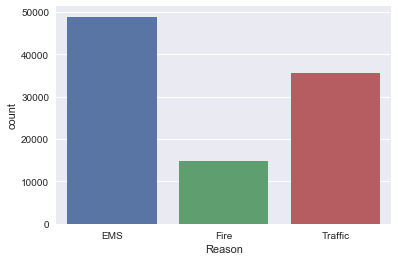

In [14]:
sns.countplot (x = 'Reason', data = dados_ligacoes)
plt.show ()

Verificando qual o tipo de dados que da coluna "timeStamp". Na coluna data data e hora,
provavelmente teremos que converter a informação da coluna para o tipo "Date"

In [15]:
type (dados_ligacoes['timeStamp'].iloc [1])

str

Convertendo data que esta em formato string para timestamp.

In [16]:
dados_ligacoes['timeStamp'] = pd.to_datetime (dados_ligacoes['timeStamp'])

In [17]:
type (dados_ligacoes['timeStamp'].iloc [0])

pandas._libs.tslib.Timestamp

Criando mais três novas colunas Horas, Meses e Dia da Semana para assim explorar um pouco
mais o Dataset

In [18]:
dados_ligacoes['Hours'] = dados_ligacoes['timeStamp'].apply (lambda hours : hours.hour)
dados_ligacoes['Months'] = dados_ligacoes['timeStamp'].apply (lambda months : months.month)
dados_ligacoes['Day of Week'] = dados_ligacoes['timeStamp'].apply (lambda week : week.dayofweek)

In [19]:
dados_ligacoes.head ()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hours,Months,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,0.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


Para melhorar ainda mais como iremos explorar algumas informações. Na coluna "Day of Week"
os dias da semana estão enumerados de zero a seis, sendo assim, iremos definir dias por
seus respectivos nomes.

In [20]:
# Definindo os nomes dos dias da semana
nome_dia = {0 : 'Mon', 1 : 'Tue', 2 : 'Wed', 3 : 'Thu',
           4 : 'Fri', 5 : 'Sat', 6 : 'Sun'}

In [21]:
dados_ligacoes['Day of Week'] = dados_ligacoes['Day of Week'].map (nome_dia)

Realizando gráfico das emergências por dias da semana

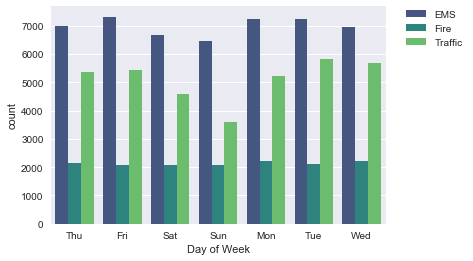

In [22]:
sns.countplot (x = 'Day of Week', data = dados_ligacoes, hue = 'Reason', palette = 'viridis')
plt.legend (bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show ()

Realizando gráfico das emergências por mês

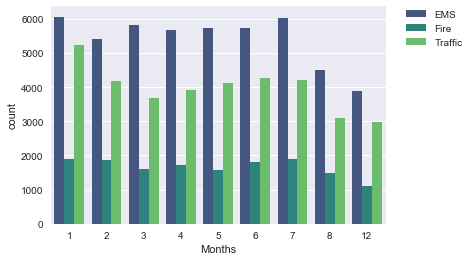

In [23]:
sns.countplot (x = 'Months', data = dados_ligacoes, hue = 'Reason', palette = 'viridis')
plt.legend (bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show ()

Devido a falta de alguns meses será necessario ser realizado um tratamento nos dados. Será 
criado um objeto o qual irá ser armazenado os dados por grupo

In [27]:
byMonth = dados_ligacoes.groupby ('Months').count ()
byMonth.head ()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hours,Day of Week
Months,,,,,,,,,,,,
1,13205,13205,13205,13205,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,11467,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,11101,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,11326,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,11423,11423,11423,11420,11378,11423,11423,11423,11423


No decorrer do ano nota-se que as ligações diminuem 

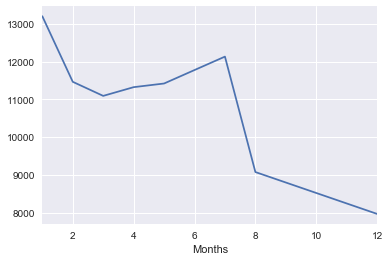

In [28]:
byMonth['twp'].plot ()
plt.show ()

Resentando index para trabalhar novamente com a coluna Months para assim plotar alguns outros
gráficos, porém deve ser resetado quando for indicado o "data".

In [29]:
byMonth.reset_index ()

,Months,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hours,Day of Week
0,1,13205,13205,13205,13205,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,11467,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,11101,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,11326,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,11423,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,11786,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,12137,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,9078,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,7969,7969,7969,7963,7916,7969,7969,7969,7969


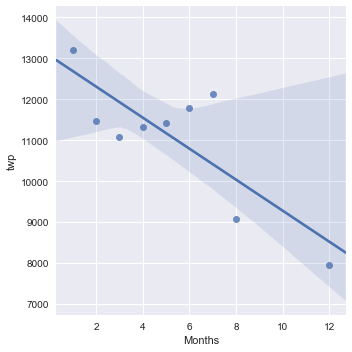

In [30]:
sns.lmplot (x = 'Months', y = 'twp', data = byMonth.reset_index ())
plt.show ()

In [31]:
dados_ligacoes['Date'] = dados_ligacoes['timeStamp'].apply (lambda data : data.date())

In [32]:
dados_ligacoes['Date'].head ()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

Plotando informação de ligações por Municipios em relação a Data 

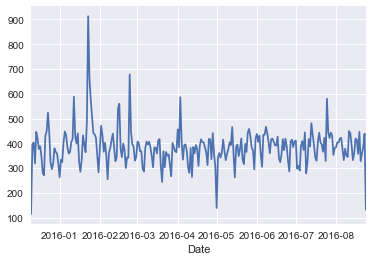

In [33]:
dados_ligacoes.groupby('Date').count()['twp'].plot ()
plt.show ()

Plotando informações sobre as Razões em relação as Datas

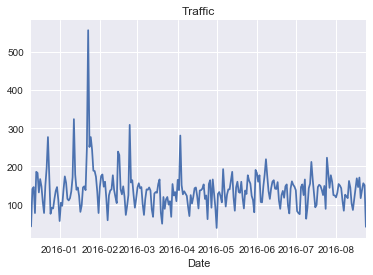

In [34]:
dados_ligacoes[dados_ligacoes['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot ()
plt.title ('Traffic')
plt.show ()

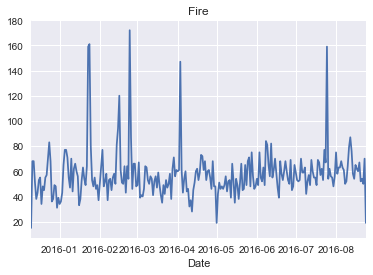

In [35]:
dados_ligacoes[dados_ligacoes['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot ()
plt.title ('Fire')
plt.show ()

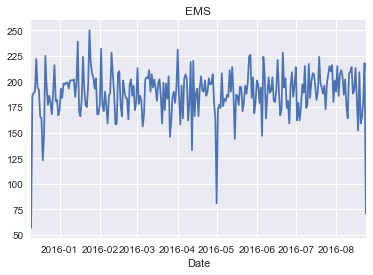

In [36]:
dados_ligacoes[dados_ligacoes['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot ()
plt.title ('EMS')
plt.show ()

Criando mapa de calor, porém será necessario reorganizar os dados para que assim, as horas se
tornem colunas e dias da semana se tornem o index

In [37]:
day_hour = dados_ligacoes.groupby (by = ['Day of Week', 'Hours']).count()['Reason'].unstack ()

In [38]:
day_hour

Hours,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


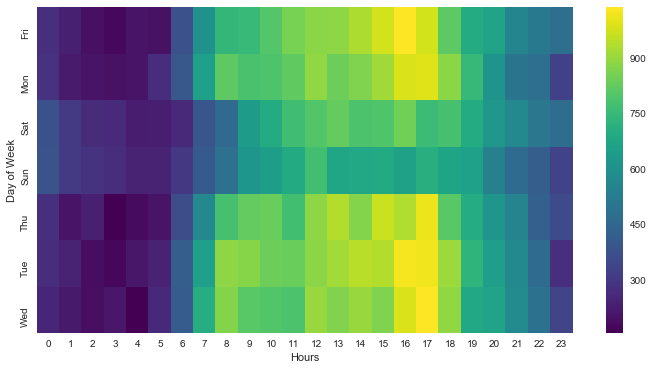

In [45]:
plt.figure (figsize = (12, 6))
sns.heatmap (day_hour, cmap = 'viridis')
plt.show ()

In [49]:
day_month = day_hour = dados_ligacoes.groupby (by = ['Day of Week', 
                                                     'Months']).count()['Reason'].unstack ()

In [50]:
day_month

Months,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


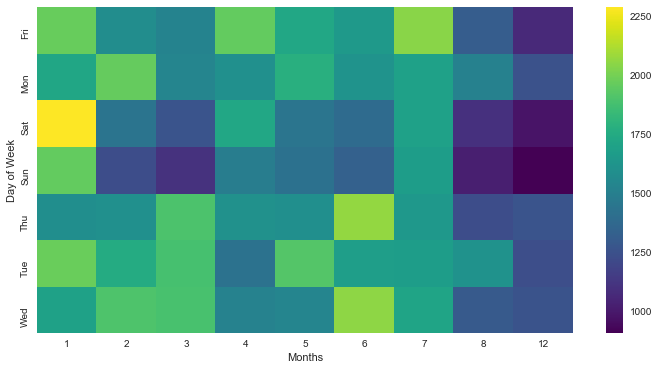

In [48]:
plt.figure (figsize = (12, 6))
sns.heatmap (day_month, cmap = 'viridis')
plt.show ()